# Problem e

In [6]:
import numpy as np
import string
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

In [8]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
eight_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
eight_test_data = eight_test.data
eight_test_target = eight_test.target
stop_words = text.ENGLISH_STOP_WORDS

#classify documents into 2 categories
print eight_test_target.shape[0]
for n in range(eight_test_target.shape[0]):
    if eight_test_target[n] <= 3:
       eight_test_target[n] = 0
    else:
       eight_test_target[n] = 1

print eight_test.target


3150
[0 0 0 ..., 1 0 0]


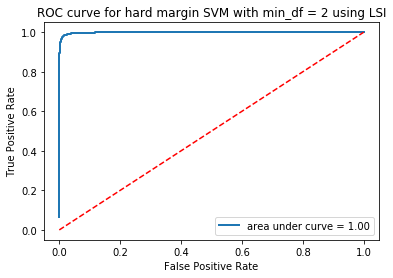

('confusion matrix', array([[1536,   24],
       [  28, 1562]]))
('accuracy =', 0.98349206349206353)
('precision =', 0.98486759142496849)
('recall =', 0.98238993710691824)


In [9]:
#performing hard margin SVM classifier for min_df = 2 using LSI
hard_min2_pipelined = Pipeline([
                                ('vect', CountVectorizer(analyzer = 'word',stop_words = stop_words,min_df = 2)),
                                ('tfidf', TfidfTransformer()),
                                ('svd', TruncatedSVD(n_components=50, random_state=42)),
                                ('clf', SVC(C = 1000, probability = True))
])

hard_min2_pipelined = hard_min2_pipelined.fit(eight_test_data, eight_test_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test_data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test_data)

# Plotting ROC curve 
fpr, tpr, thresholds = roc_curve(eight_test_target, predicted_prob)
area_under_roc = auc(fpr,tpr)
plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for hard margin SVM with min_df = 2 using LSI')
plt.legend(loc="lower right")
plt.show()

# confusion matrix, accuracy, recall and precision
confusionmatrix = confusion_matrix(eight_test_target,predicted_data)
accuracy = accuracy_score(eight_test_target,predicted_data)
precision = precision_score(eight_test_target,predicted_data)
recall = recall_score(eight_test_target,predicted_data)
print("confusion matrix", confusionmatrix)
print("accuracy =",accuracy)
print("precision =", precision)
print("recall =",recall)

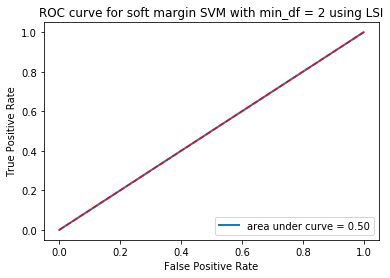

('confusion matrix', array([[   0, 1560],
       [   0, 1590]]))
('accuracy =', 0.50476190476190474)
('precision =', 0.50476190476190474)
('recall =', 1.0)


In [10]:
#performing soft margin SVM classifier for min_df = 2 using LSI
hard_min2_pipelined = Pipeline([
                                ('vect', CountVectorizer(analyzer = 'word',stop_words = stop_words,min_df = 2)),
                                ('tfidf', TfidfTransformer()),
                                ('svd', TruncatedSVD(n_components=50, random_state=42)),
                                ('clf', SVC(C = 0.001, probability = True))
])

hard_min2_pipelined = hard_min2_pipelined.fit(eight_test_data, eight_test_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test_data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test_data)

# Plotting ROC curve for min_df = 2
fpr, tpr, thresholds = roc_curve(eight_test_target, predicted_prob)
area_under_roc = auc(fpr,tpr)
plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for soft margin SVM with min_df = 2 using LSI')
plt.legend(loc="lower right")
plt.show()

# confusion matrix, accuracy, recall and precision
confusionmatrix = confusion_matrix(eight_test_target,predicted_data)
accuracy = accuracy_score(eight_test_target,predicted_data)
precision = precision_score(eight_test_target,predicted_data)
recall = recall_score(eight_test_target,predicted_data)
print("confusion matrix", confusionmatrix)
print("accuracy =",accuracy)
print("precision =", precision)
print("recall =",recall)

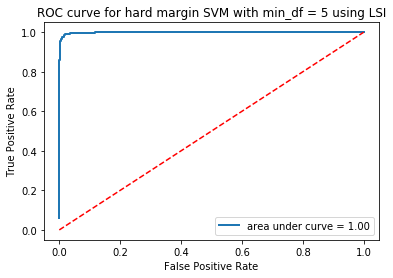

('confusion matrix', array([[1534,   26],
       [  25, 1565]]))
('accuracy =', 0.9838095238095238)
('precision =', 0.98365807668133254)
('recall =', 0.98427672955974843)


In [11]:
#performing hard margin SVM classifier for min_df = 5 using LSI
hard_min2_pipelined = Pipeline([
                                ('vect', CountVectorizer(analyzer = 'word',stop_words = stop_words,min_df = 5)),
                                ('tfidf', TfidfTransformer()),
                                ('svd', TruncatedSVD(n_components=50, random_state=42)),
                                ('clf', SVC(C = 1000, probability = True))
])

hard_min2_pipelined = hard_min2_pipelined.fit(eight_test_data, eight_test_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test_data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test_data)

# Plotting ROC curve for min_df = 2
fpr, tpr, thresholds = roc_curve(eight_test_target, predicted_prob)
area_under_roc = auc(fpr,tpr)
plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for hard margin SVM with min_df = 5 using LSI')
plt.legend(loc="lower right")
plt.show()

# confusion matrix, accuracy, recall and precision
confusionmatrix = confusion_matrix(eight_test_target,predicted_data)
accuracy = accuracy_score(eight_test_target,predicted_data)
precision = precision_score(eight_test_target,predicted_data)
recall = recall_score(eight_test_target,predicted_data)
print("confusion matrix", confusionmatrix)
print("accuracy =",accuracy)
print("precision =", precision)
print("recall =",recall)

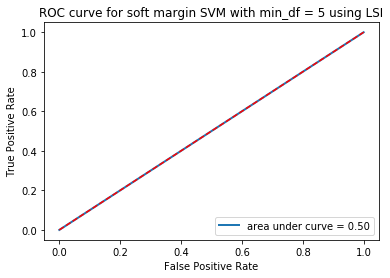

('confusion matrix', array([[   0, 1560],
       [   0, 1590]]))
('accuracy =', 0.50476190476190474)
('precision =', 0.50476190476190474)
('recall =', 1.0)


In [12]:
#performing soft margin SVM classifier for min_df = 5 using LSI
hard_min2_pipelined = Pipeline([
                                ('vect', CountVectorizer(analyzer = 'word',stop_words = stop_words,min_df = 5)),
                                ('tfidf', TfidfTransformer()),
                                ('svd', TruncatedSVD(n_components=50, random_state=42)),
                                ('clf', SVC(C = 0.001, probability = True))
])

hard_min2_pipelined = hard_min2_pipelined.fit(eight_test_data, eight_test_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test_data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test_data)

# Plotting ROC curve for min_df = 2
fpr, tpr, thresholds = roc_curve(eight_test_target, predicted_prob)
area_under_roc = auc(fpr,tpr)
plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for soft margin SVM with min_df = 5 using LSI')
plt.legend(loc="lower right")
plt.show()

# confusion matrix, accuracy, recall and precision
confusionmatrix = confusion_matrix(eight_test_target,predicted_data)
accuracy = accuracy_score(eight_test_target,predicted_data)
precision = precision_score(eight_test_target,predicted_data)
recall = recall_score(eight_test_target,predicted_data)
print("confusion matrix", confusionmatrix)
print("accuracy =",accuracy)
print("precision =", precision)
print("recall =",recall)

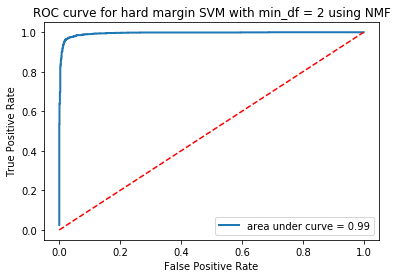

('confusion matrix', array([[1501,   59],
       [  39, 1551]]))
('accuracy =', 0.96888888888888891)
('precision =', 0.9633540372670808)
('recall =', 0.97547169811320755)


In [13]:
#performing hard margin SVM classifier for min_df = 2 using NMF
hard_min2_pipelined = Pipeline([
                                ('vect', CountVectorizer(analyzer = 'word',stop_words = stop_words,min_df = 2)),
                                ('tfidf', TfidfTransformer()),
                                ('nmf', NMF(50, random_state = 42)),
                                ('clf', SVC(C = 1000, probability = True))
])

hard_min2_pipelined = hard_min2_pipelined.fit(eight_test_data, eight_test_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test_data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test_data)

# Plotting ROC curve for min_df = 2
fpr, tpr, thresholds = roc_curve(eight_test_target, predicted_prob)
area_under_roc = auc(fpr,tpr)
plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for hard margin SVM with min_df = 2 using NMF')
plt.legend(loc="lower right")
plt.show()

# confusion matrix, accuracy, recall and precision
confusionmatrix = confusion_matrix(eight_test_target,predicted_data)
accuracy = accuracy_score(eight_test_target,predicted_data)
precision = precision_score(eight_test_target,predicted_data)
recall = recall_score(eight_test_target,predicted_data)
print("confusion matrix", confusionmatrix)
print("accuracy =",accuracy)
print("precision =", precision)
print("recall =",recall)

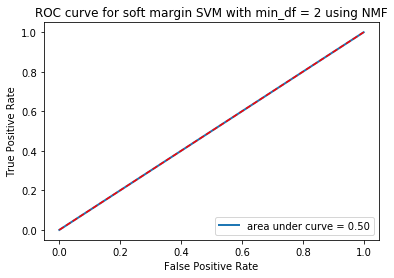

('confusion matrix', array([[   0, 1560],
       [   0, 1590]]))
('accuracy =', 0.50476190476190474)
('precision =', 0.50476190476190474)
('recall =', 1.0)


In [15]:
#performing soft margin SVM classifier for min_df = 2 using NMF
hard_min2_pipelined = Pipeline([
                                ('vect', CountVectorizer(analyzer = 'word',stop_words = stop_words,min_df = 2)),
                                ('tfidf', TfidfTransformer()),
                                ('nmf', NMF(50, random_state = 42)),
                                ('clf', SVC(C = 0.001, probability = True))
])

hard_min2_pipelined = hard_min2_pipelined.fit(eight_test_data, eight_test_target)
predicted_prob = hard_min2_pipelined.predict_proba(eight_test_data)[:,1]
predicted_data = hard_min2_pipelined.predict(eight_test_data)

# Plotting ROC curve for min_df = 2
fpr, tpr, thresholds = roc_curve(eight_test_target, predicted_prob)
area_under_roc = auc(fpr,tpr)
plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.2f' % area_under_roc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for soft margin SVM with min_df = 2 using NMF')
plt.legend(loc="lower right")
plt.show()

# confusion matrix, accuracy, recall and precision
confusionmatrix = confusion_matrix(eight_test_target,predicted_data)
accuracy = accuracy_score(eight_test_target,predicted_data)
precision = precision_score(eight_test_target,predicted_data)
recall = recall_score(eight_test_target,predicted_data)
print("confusion matrix", confusionmatrix)
print("accuracy =",accuracy)
print("precision =", precision)
print("recall =",recall)